In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('../input/blood-donation/Blood Donation Analysis/blood-train.csv')
data_test =pd.read_csv('../input/blood-donation/Blood Donation Analysis/blood-test.csv')
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
data.shape

(576, 6)

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64


<AxesSubplot:>

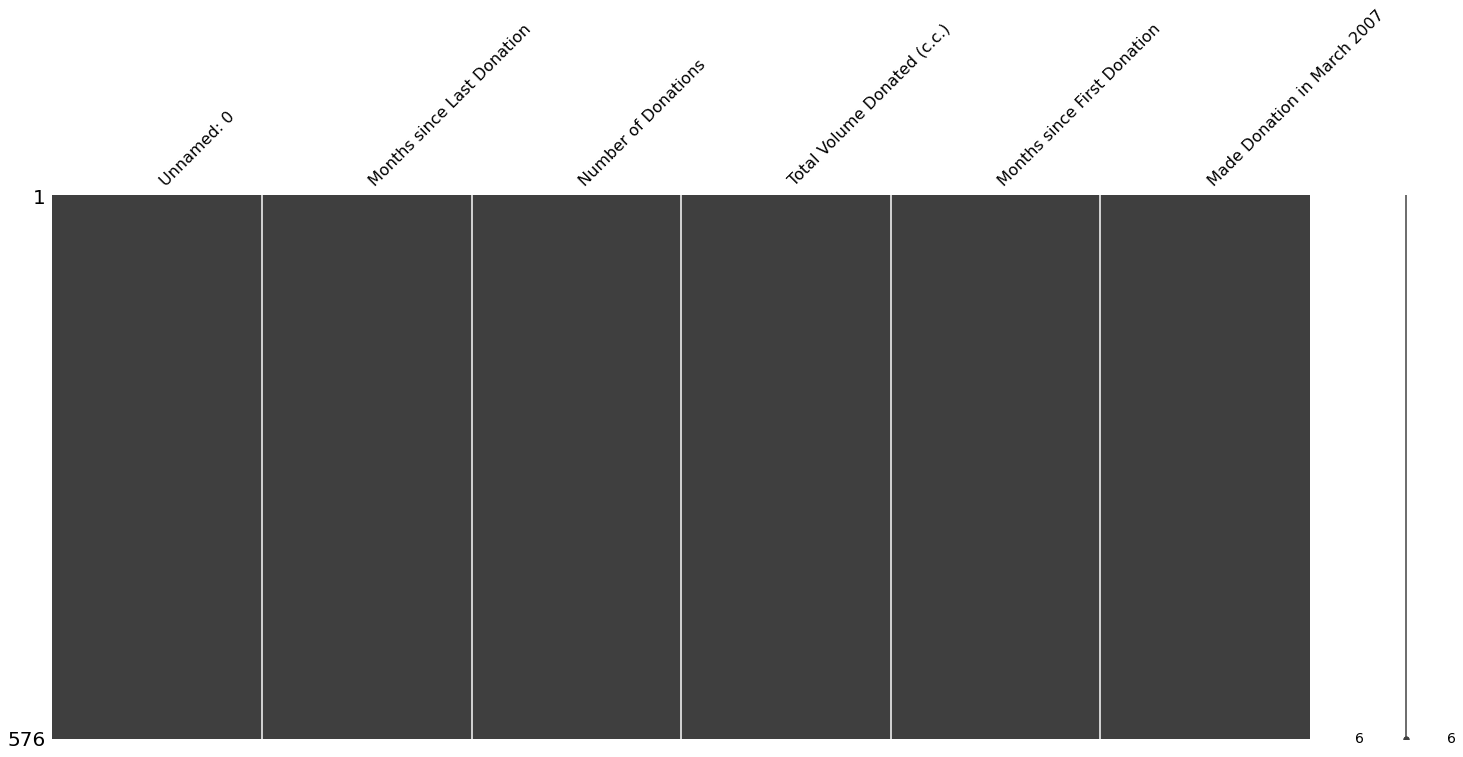

In [5]:
print(data.isnull().sum())
ms.matrix(data)

In [6]:
data['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

<AxesSubplot:xlabel='Made Donation in March 2007', ylabel='count'>

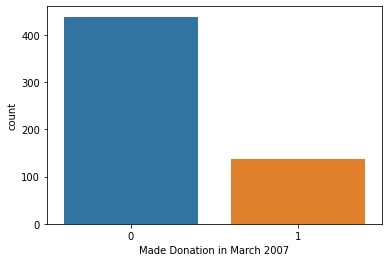

In [7]:
sns.countplot(data['Made Donation in March 2007'])

In [8]:
data = data.drop('Unnamed: 0', axis =1)
data.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [9]:

data_test = data_test.drop('Unnamed: 0',axis =1)
data_test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34


In [10]:
data_train = data.iloc[:,:-1]
data_train.head()

new_data = pd.merge(data_train,data_test)
new_data.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [11]:
y= data.iloc[:,-1]
y.head()
x=new_data


              
             EDA

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score

In [13]:
data_train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot:ylabel='Months since Last Donation'>

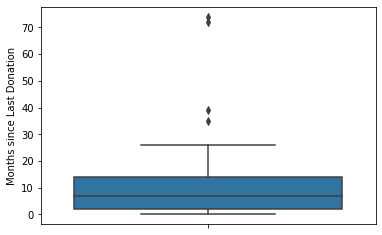

In [14]:
sns.boxplot(y=data_train['Months since Last Donation'], data = data_train)

#from the plot we observed that mostly donation are done nearly 10 months before

<AxesSubplot:>

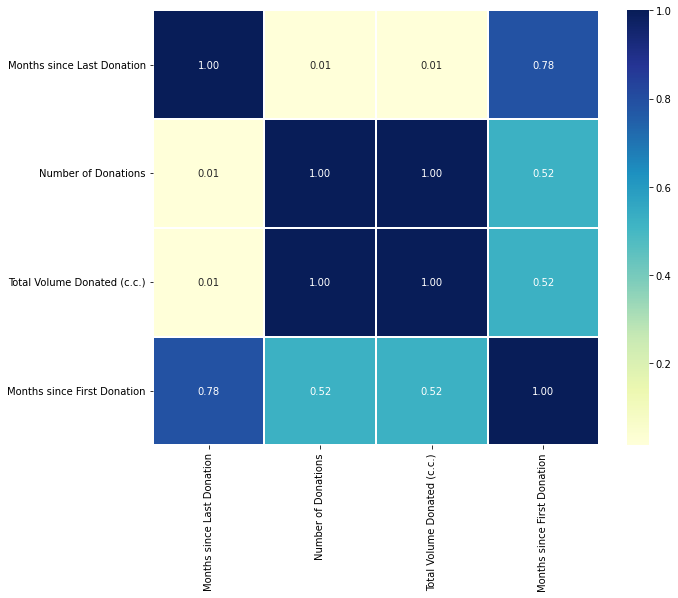

In [15]:
corrmat = x.corr()
f,ax =plt.subplots(figsize=(10,8))
sns.heatmap(corrmat,ax=ax,cmap ="YlGnBu",linewidths = 0.1,fmt =".2f", annot =True)

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72])

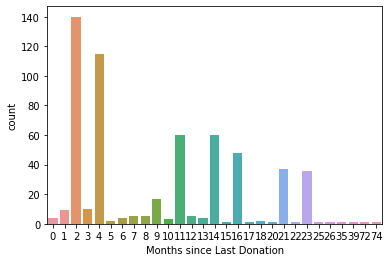

In [16]:
sns.countplot(data['Months since Last Donation'])
data['Months since Last Donation'].unique()

Text(0, 0.5, 'values')

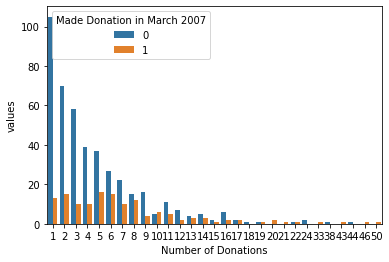

In [17]:
sns.countplot(data['Number of Donations'], hue =data['Made Donation in March 2007'])
plt.ylabel('values')


# as we can see in the plot below, mostly those who donated blood only one time, not donated again on march 2007
# more number of people donated again who donated 10 times before

In [18]:
x['donating total months '] = (x['Months since First Donation'] - x['Months since Last Donation'])
x.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,donating total months
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


In [19]:
x= x.drop('Total Volume Donated (c.c.)',axis =1)
x.head()

,Months since Last Donation,Number of Donations,Months since First Donation,donating total months
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [20]:
x.dtypes
x.shape

(810, 4)

In [21]:
#feature transformation
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x)
x.head()

,Months since Last Donation,Number of Donations,Months since First Donation,donating total months
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [22]:
x=x[:576]
y=y[:576]
test = x[576:]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)
y_train.shape

(403,)

In [24]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import score

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
predict = logreg.predict(x_test)

print(logreg.score(x_test,y_test))
accuracy_score(y_test,predict)



0.7745664739884393


0.7745664739884393

In [25]:
from sklearn.svm import SVC

svccl = SVC(kernel = 'linear',gamma = 'scale', shrinking = False)

svccl.fit(x_train,y_train)
predict = svccl.predict(x_test)
svccl.score(x_test,y_test)

0.7572254335260116

In [26]:
confusion_matrix(predict,y_test)

array([[130,  38],
       [  4,   1]])

In [27]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

predict = rfc.predict(x_test)

accuracy_score(predict,y_test)


0.7572254335260116

In [28]:
confusion_matrix(predict,y_test)

array([[126,  34],
       [  8,   5]])

In [29]:
#feature importance

feature_imp = pd.Series(rfc.feature_importances_, index = x.columns).sort_values(ascending = False)
feature_imp

Number of Donations            0.410667
donating total months          0.250869
Months since Last Donation     0.176639
Months since First Donation    0.161825
dtype: float64

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'lbfgs', alpha = 1e-5,hidden_layer_sizes = (25,),random_state =1)

mlp.fit(x_train,y_train)

predict = mlp.predict(x_test)

accuracy_score(predict,y_test)

0.7687861271676301

In [31]:
confusion_matrix(predict,y_test)

array([[128,  34],
       [  6,   5]])